### Regularization

In [28]:
import numpy as np

def l2(input_size, output_size, sample_size):
    # Set the hyperparameters for the model
    learning_rate = 0.01
    regularization_strength = 0.1

    # Define the model parameters
    W = np.random.randn(input_size, output_size)
    b = np.zeros(output_size)

    # Define the input placeholder
    X = np.random.randn(sample_size, input_size)

    # Define the model output
    Y = X.dot(W) + b

    # Define the target placeholder
    T = np.random.randn(sample_size, output_size)

    # Define the L2 regularization term
    regularization = regularization_strength * np.sum(W ** 2)

    # Define the mean squared error loss function
    loss = np.mean((Y - T) ** 2) + regularization

    # Define the gradient of the loss function with respect to the model parameters
    dW = 2 * (Y - T).dot(X) + 2 * regularization_strength * W
    db = 2 * np.sum(Y - T, axis=0)

    # Update the model parameters using gradient descent
    W = W - learning_rate * dW
    b = b - learning_rate * db
    retrun (W, b)


### Stock-Market-Prediction-using-LSTM

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-12-22,85.519997,85.680000,82.250000,83.790001,83.790001,81431300,AMAZON
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700,AMAZON
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000,AMAZON
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600,AMAZON
2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900,AMAZON
2022-12-30,83.120003,84.050003,82.470001,84.000000,84.000000,62330000,AMAZON
2023-01-03,85.459999,86.959999,84.209999,85.820000,85.820000,76706000,AMAZON
2023-01-04,86.550003,86.980003,83.360001,85.139999,85.139999,68885100,AMAZON
2023-01-05,85.330002,85.419998,83.070000,83.120003,83.120003,67930800,AMAZON


## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [2]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,153.920520,156.024200,151.801120,153.955480,153.520856,8.781345e+07
std,13.121911,13.010978,13.199822,13.185141,12.979850,2.371325e+07
min,126.010002,127.769997,124.169998,125.019997,125.019997,3.519590e+07
25%,143.484997,146.572502,141.115005,143.757500,143.385052,7.227205e+07
50%,152.660004,155.345001,150.855003,152.994995,152.530830,8.342450e+07
75%,165.010002,167.065002,163.007496,165.247494,164.625645,9.632570e+07
max,178.550003,179.610001,176.699997,178.960007,178.154037,1.826020e+08


We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [3]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-01-10 to 2023-01-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

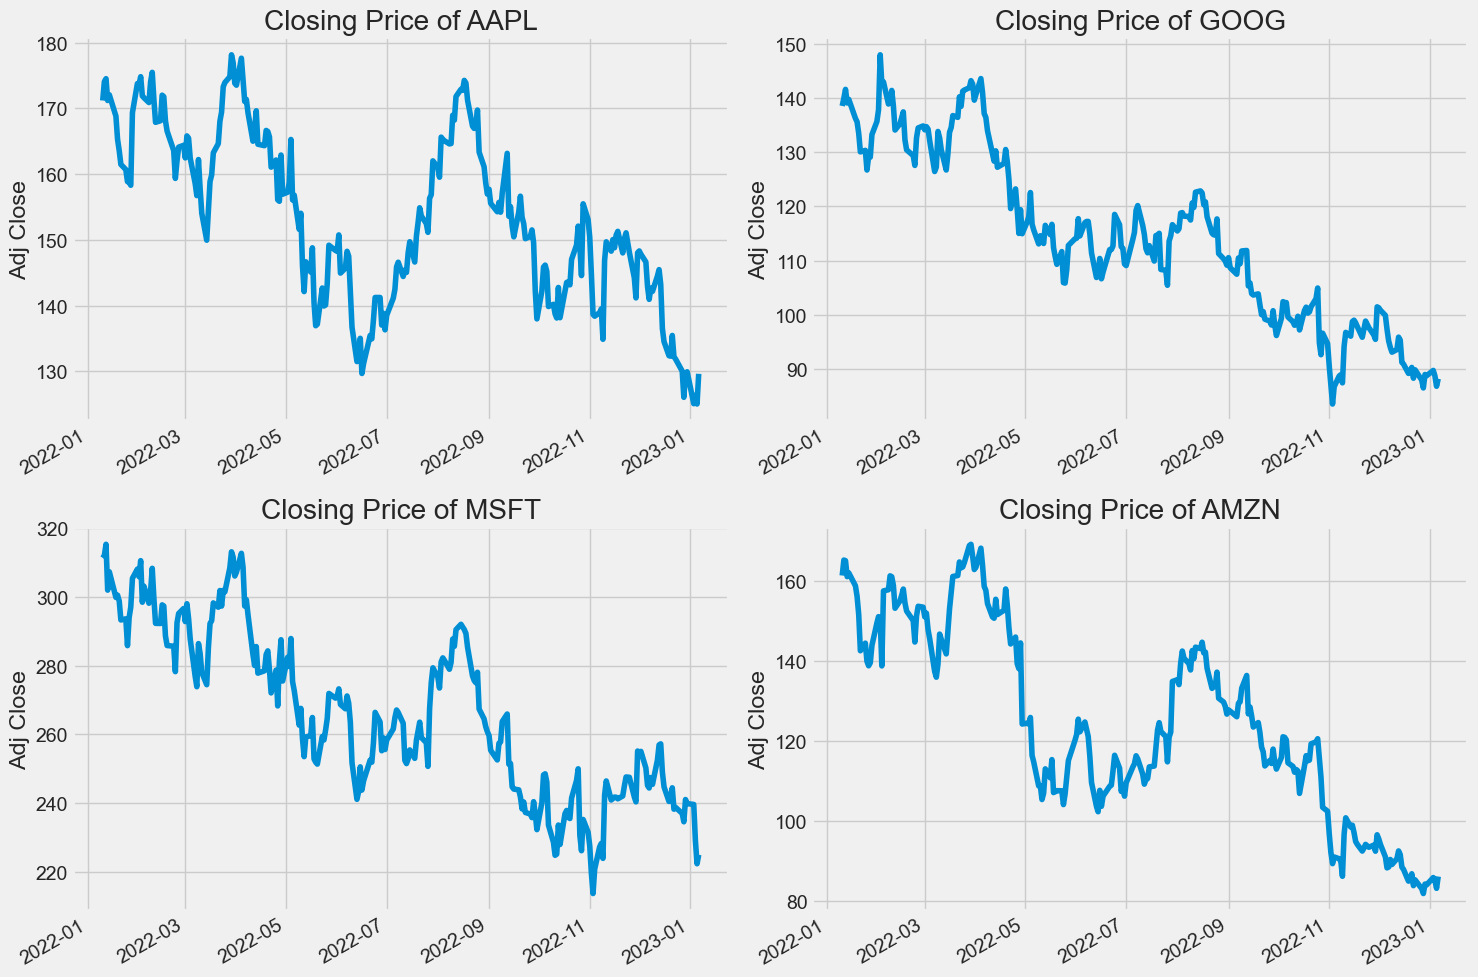

In [4]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

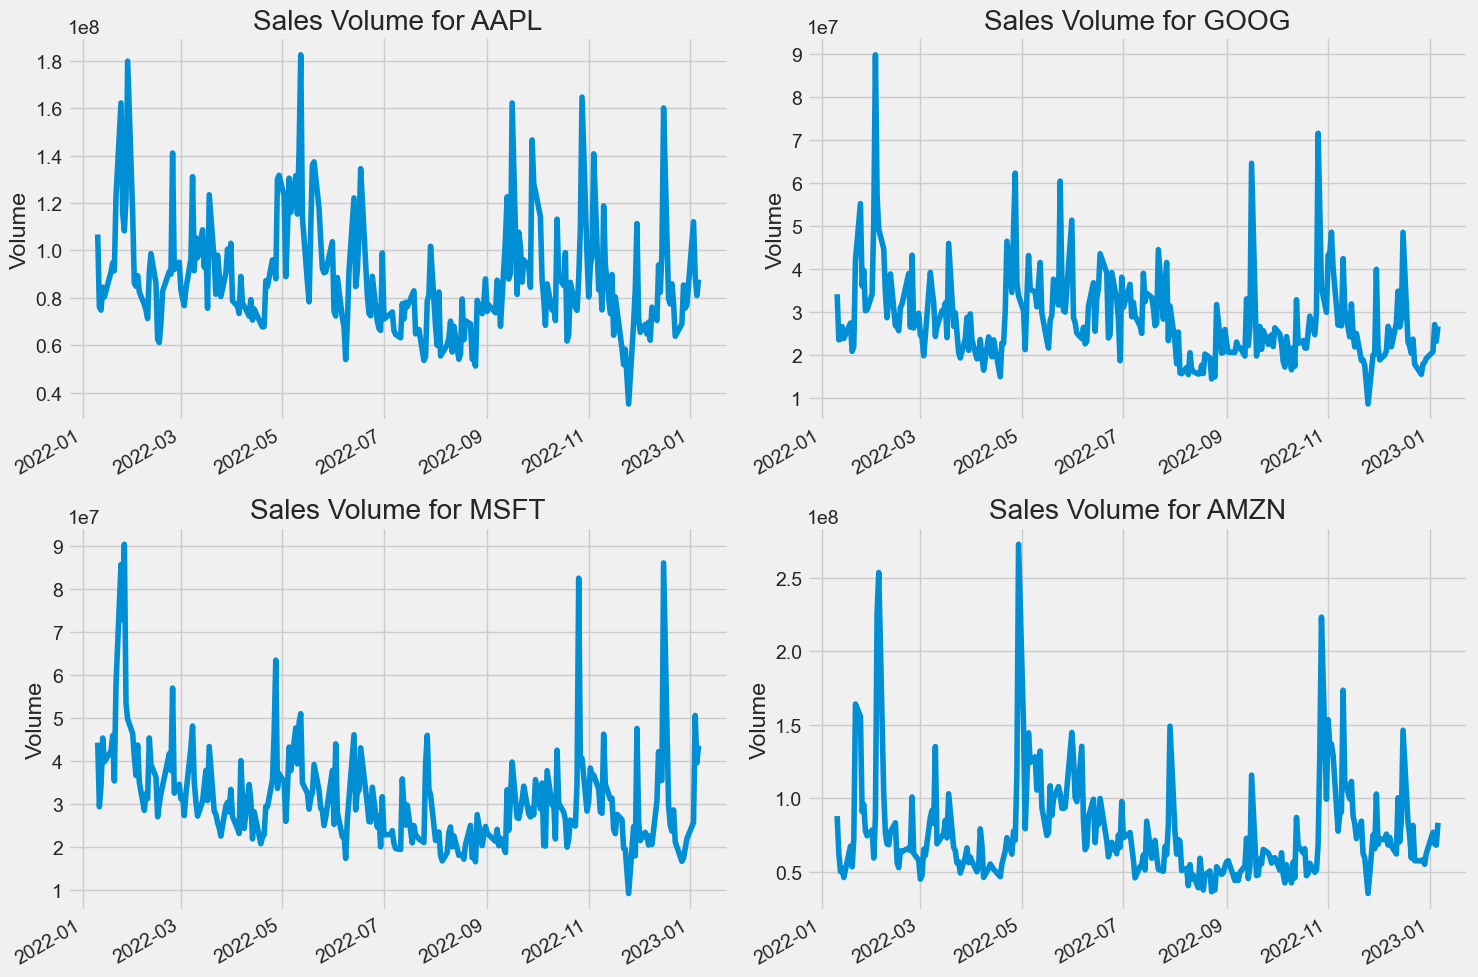

In [5]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

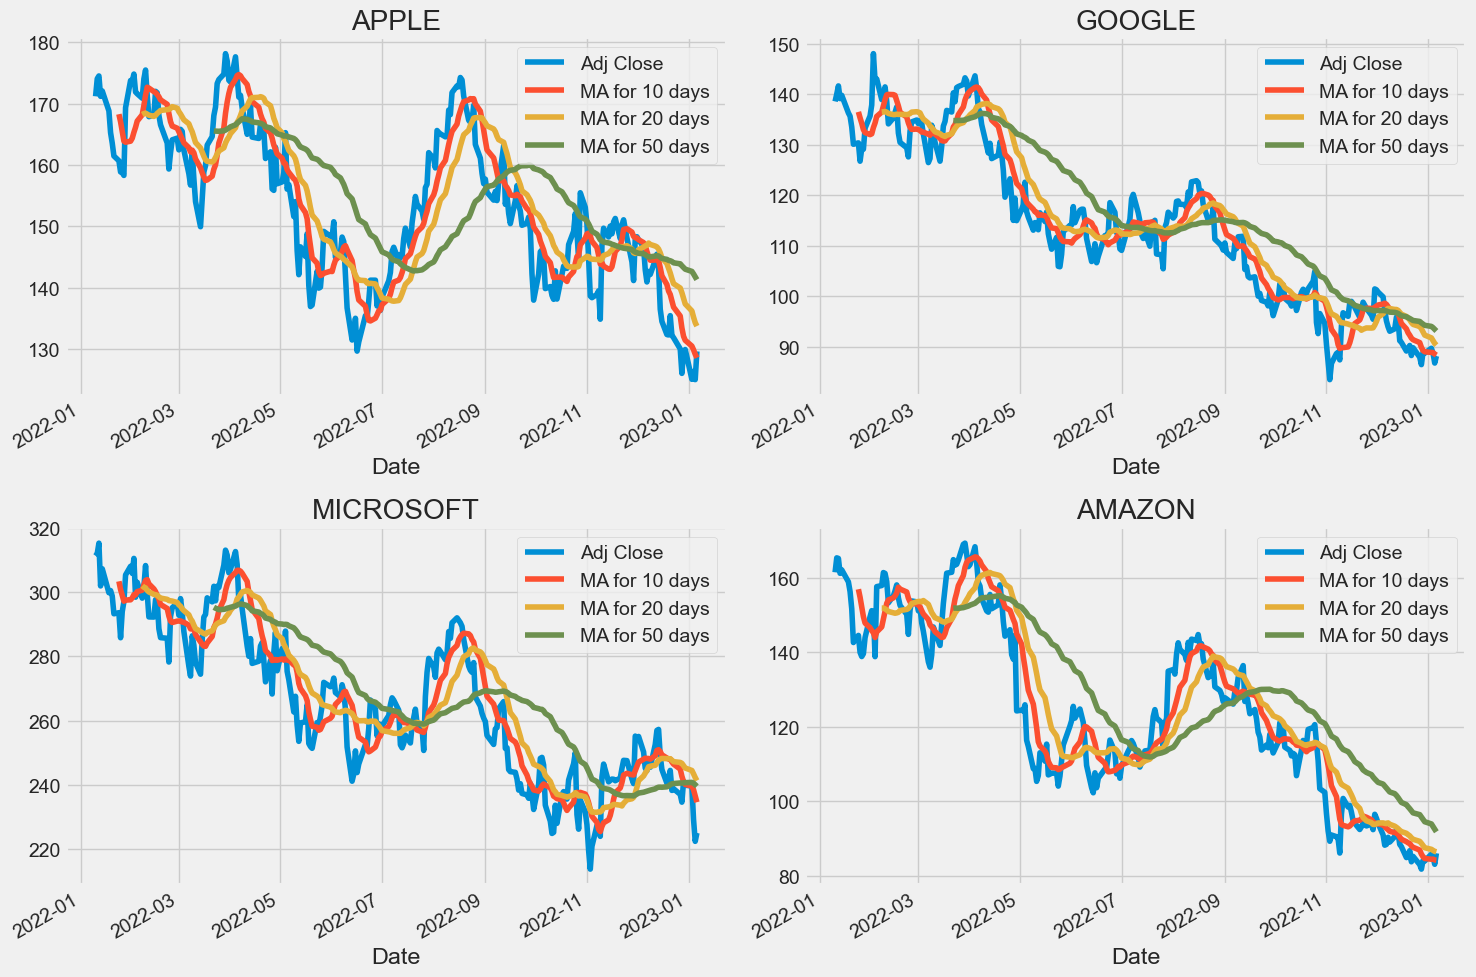

In [6]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

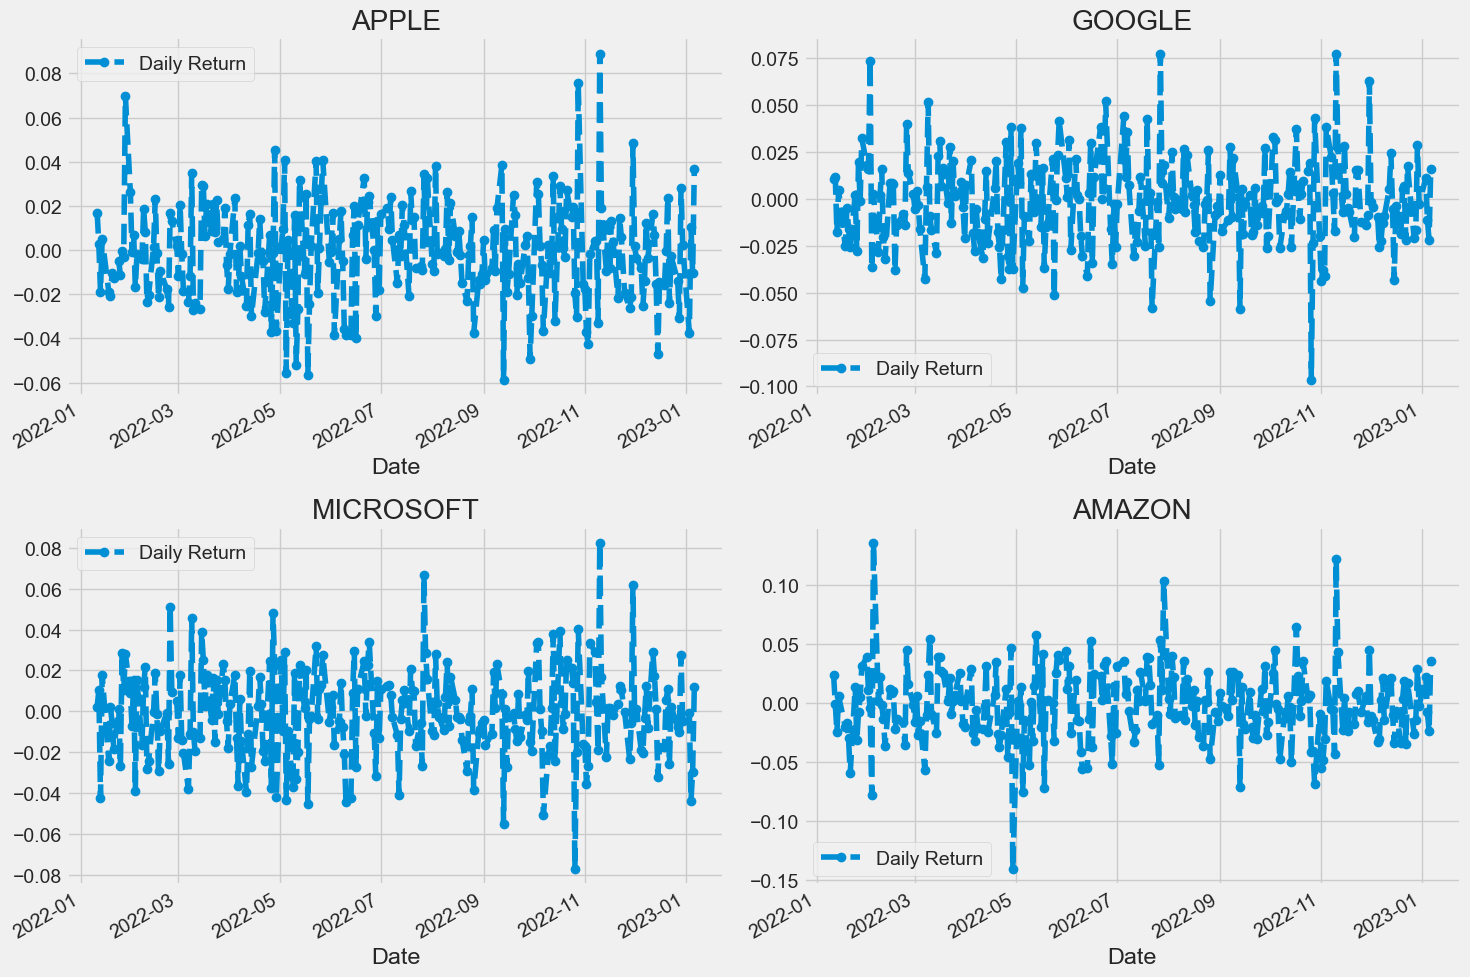

In [7]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

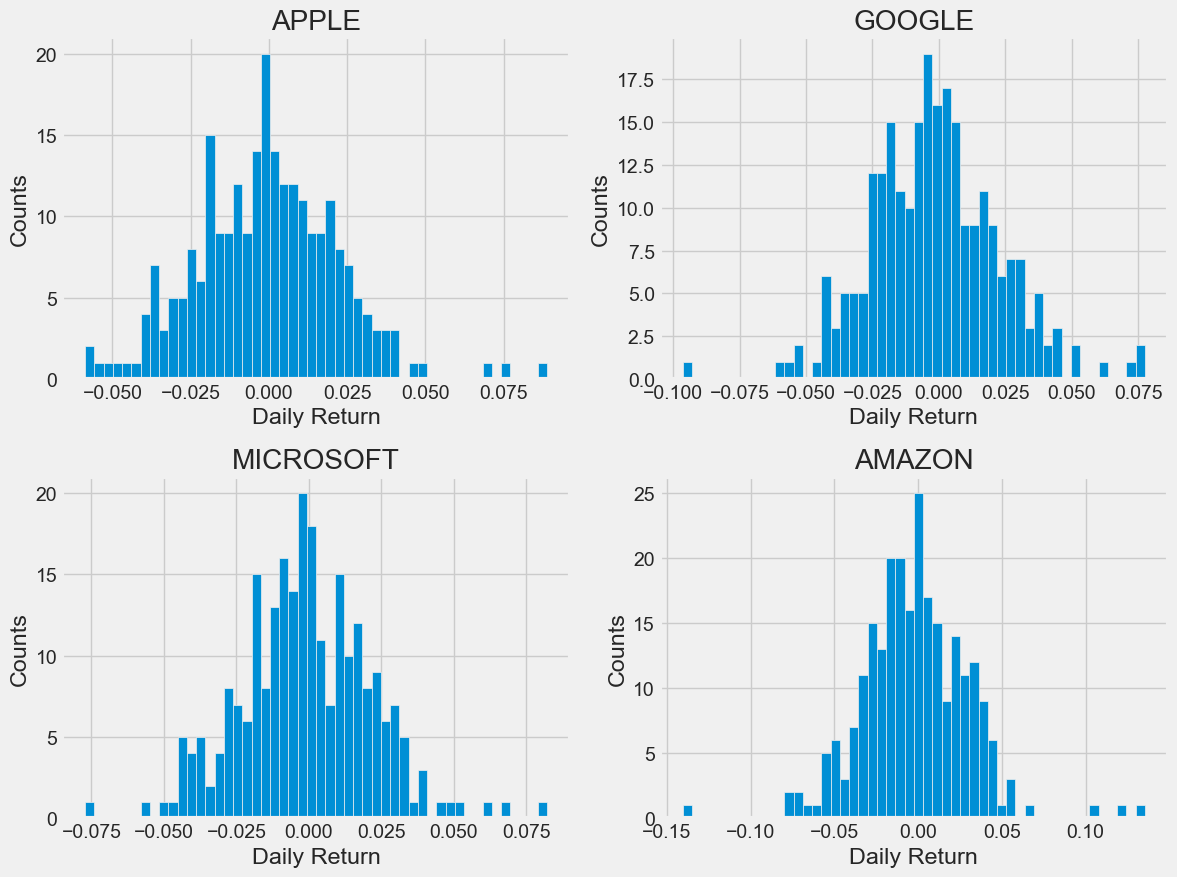

In [8]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [9]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start, end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-01-10,NaN,NaN,NaN,NaN
2022-01-11,0.016784,0.024002,0.010417,0.002259
2022-01-12,0.002570,-0.000937,0.011645,0.010445
2022-01-13,-0.019028,-0.024170,-0.017769,-0.042323
2022-01-14,0.005111,0.005731,0.004711,0.017717


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

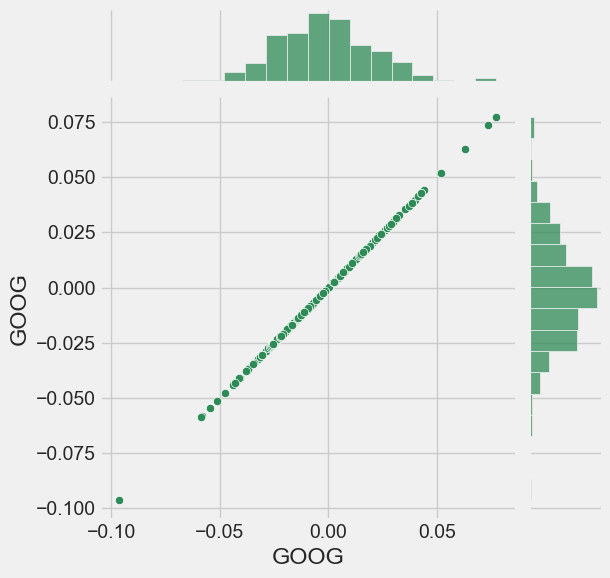

In [10]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

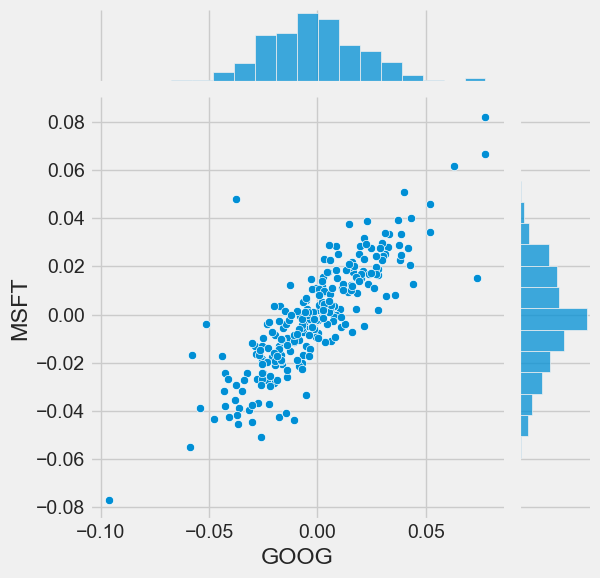

In [11]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

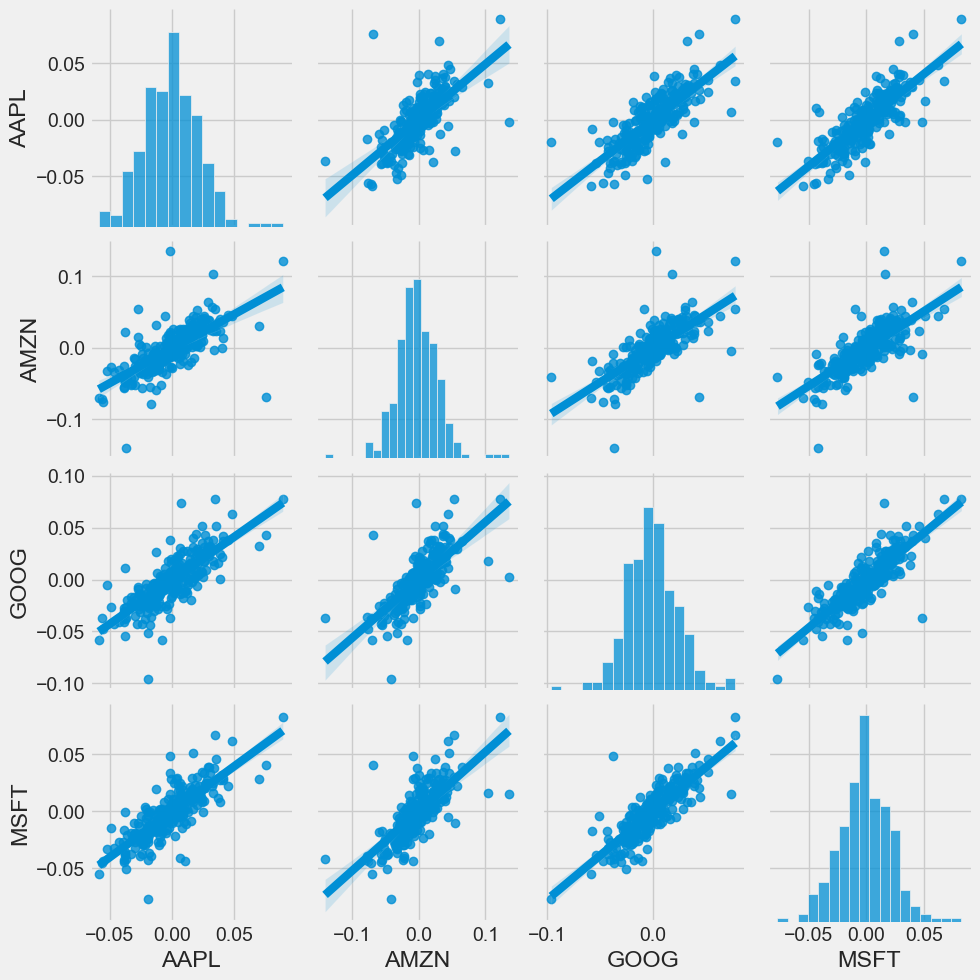

In [12]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. 

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

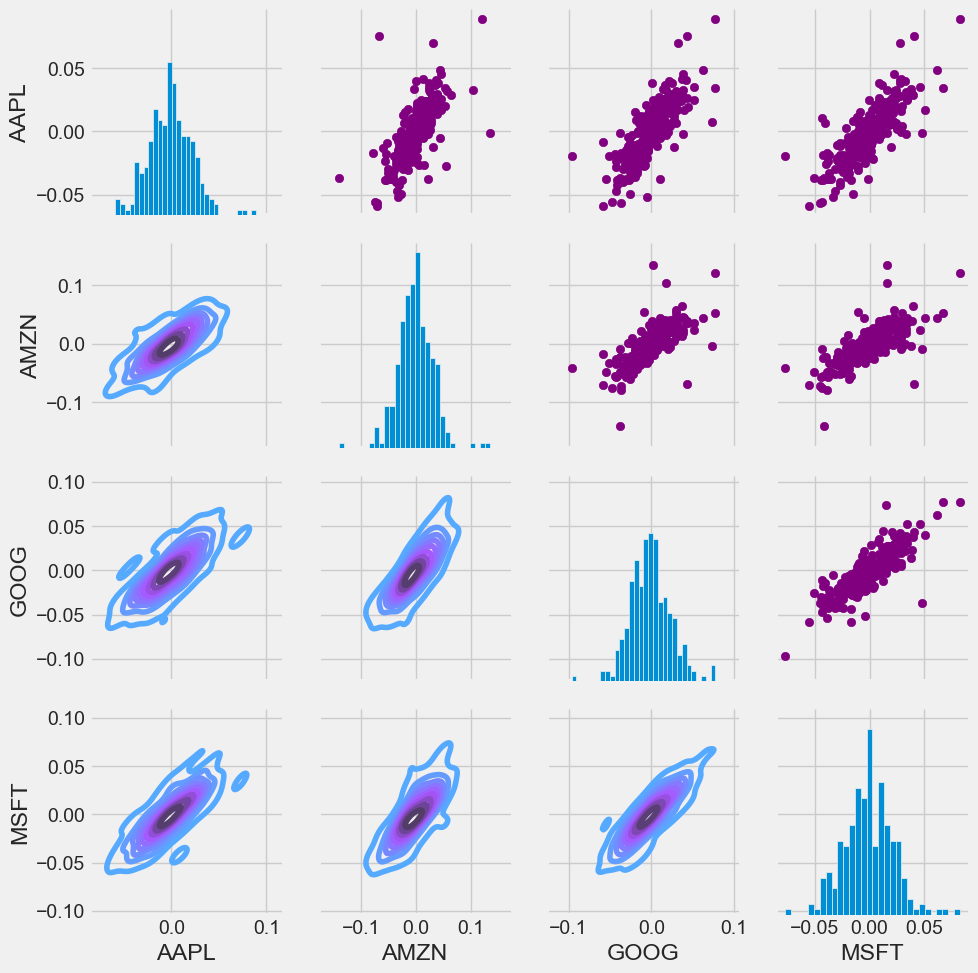

In [13]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

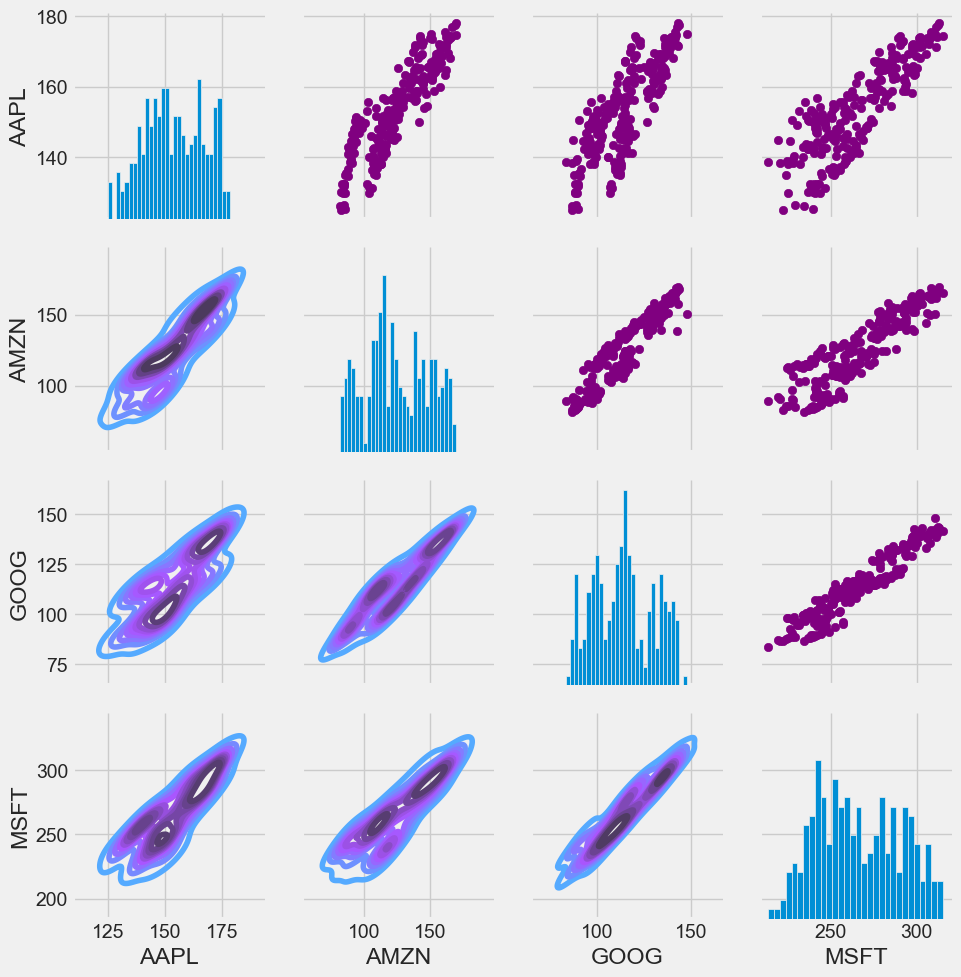

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

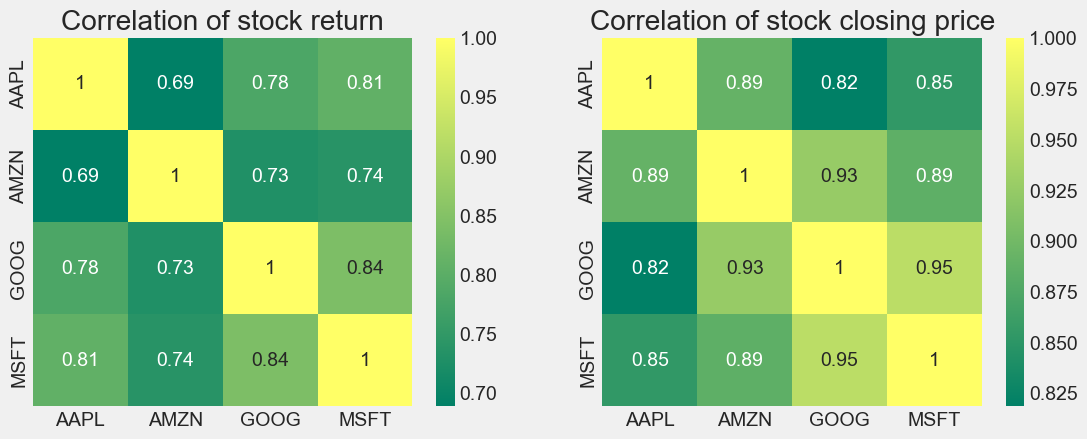

In [15]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

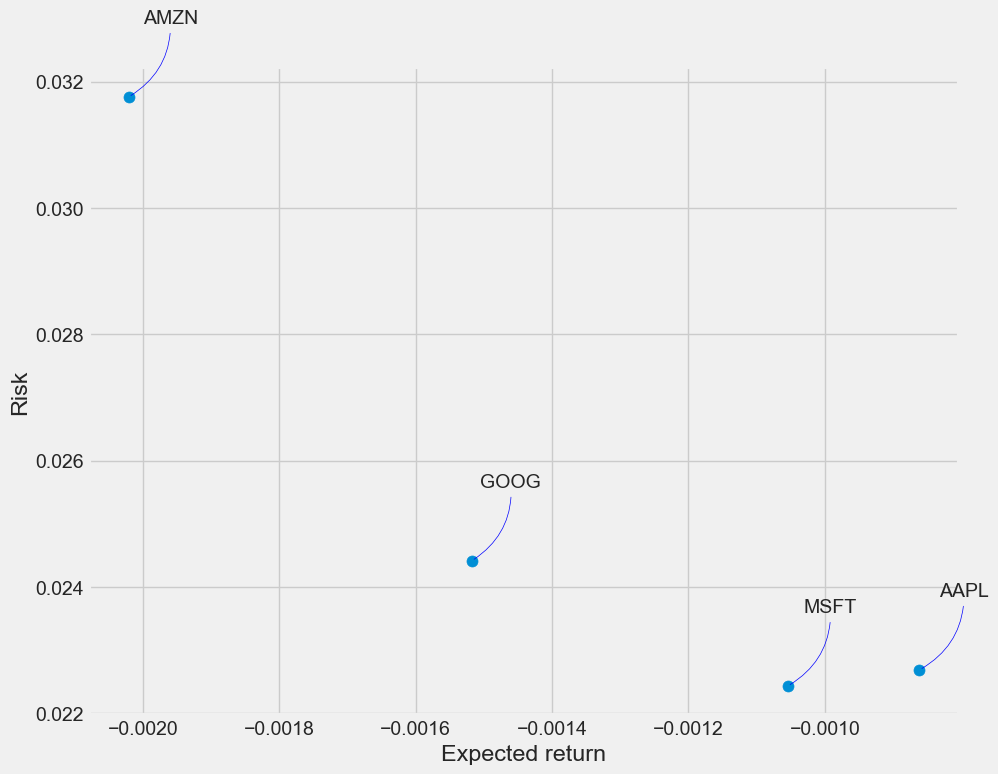

In [16]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:

In [17]:
# Get the stock quote
df = yf.download('AAPL', start, end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-10,169.080002,172.500000,168.169998,172.190002,171.196426,106765600
2022-01-11,172.320007,175.179993,170.820007,175.080002,174.069733,76138300
2022-01-12,176.119995,177.179993,174.820007,175.529999,174.517136,74805200
2022-01-13,175.779999,176.619995,171.789993,172.190002,171.196426,84505800
2022-01-14,171.339996,173.779999,171.089996,173.070007,172.071350,80440800
...,...,...,...,...,...,...
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.929993,76960600
2023-01-03,130.279999,130.899994,124.169998,125.070000,125.070000,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,126.360001,89113600


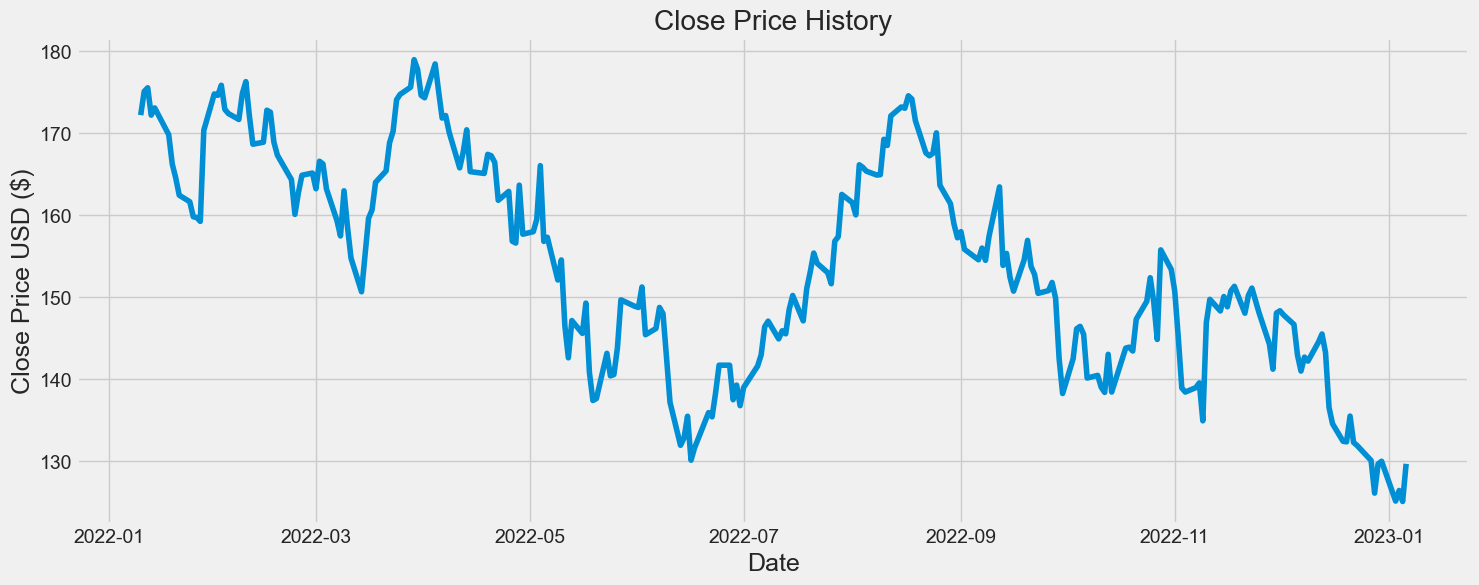

In [18]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [19]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

238

In [20]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[8.74490118e-01],
       [9.28068147e-01],
       [9.36410692e-01],
       [8.74490118e-01],
       [8.90804629e-01],
       [8.30181647e-01],
       [7.63996874e-01],
       [7.32109575e-01],
       [6.93177605e-01],
       [6.78531547e-01],
       [6.44419645e-01],
       [6.42751193e-01],
       [6.34037786e-01],
       [8.40007355e-01],
       [9.22506356e-01],
       [9.19354741e-01],
       [9.42157772e-01],
       [8.87652731e-01],
       [8.78197885e-01],
       [8.64664411e-01],
       [9.23433368e-01],
       [9.50315027e-01],
       [8.73192245e-01],
       [8.08676207e-01],
       [8.13125696e-01],
       [8.85613417e-01],
       [8.81164211e-01],
       [8.13125696e-01],
       [7.83833862e-01],
       [7.28587381e-01],
       [6.49796146e-01],
       [6.99295547e-01],
       [7.38413089e-01],
       [7.43418446e-01],
       [7.07823381e-01],
       [7.70114816e-01],
       [7.63996874e-01],
       [7.07267230e-01],
       [6.35520949e-01],
       [6.01038186e-01],


In [21]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.87449012, 0.92806815, 0.93641069, 0.87449012, 0.89080463,
       0.83018165, 0.76399687, 0.73210958, 0.69317761, 0.67853155,
       0.64441964, 0.64275119, 0.63403779, 0.84000735, 0.92250636,
       0.91935474, 0.94215777, 0.88765273, 0.87819788, 0.86466441,
       0.92343337, 0.95031503, 0.87319224, 0.80867621, 0.8131257 ,
       0.88561342, 0.88116421, 0.8131257 , 0.78383386, 0.72858738,
       0.64979615, 0.69929555, 0.73841309, 0.74341845, 0.70782338,
       0.77011482, 0.76399687, 0.70726723, 0.63552095, 0.60103819,
       0.7031886 , 0.62106046, 0.55079706, 0.47460129, 0.55747115,
       0.64089717, 0.65999243, 0.72228387, 0.7482388 , 0.81201339,
       0.83778275, 0.90934374, 0.92139405, 0.93770857, 1.        ,
       0.97793841, 0.91935474, 0.91379295, 0.99035958, 0.92769729])]
[0.867816026110233]

[array([0.87449012, 0.92806815, 0.93641069, 0.87449012, 0.89080463,
       0.83018165, 0.76399687, 0.73210958, 0.69317761, 0.67853155,
       0.64441964, 0.64275119, 0.6340

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

178/178 [==============================] - 10s 30ms/step - loss: 0.0209


In [23]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 1s/step


5.464770204768571

C:\Users\HP 1040 G2\AppData\Local\Temp\ipykernel_12504\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


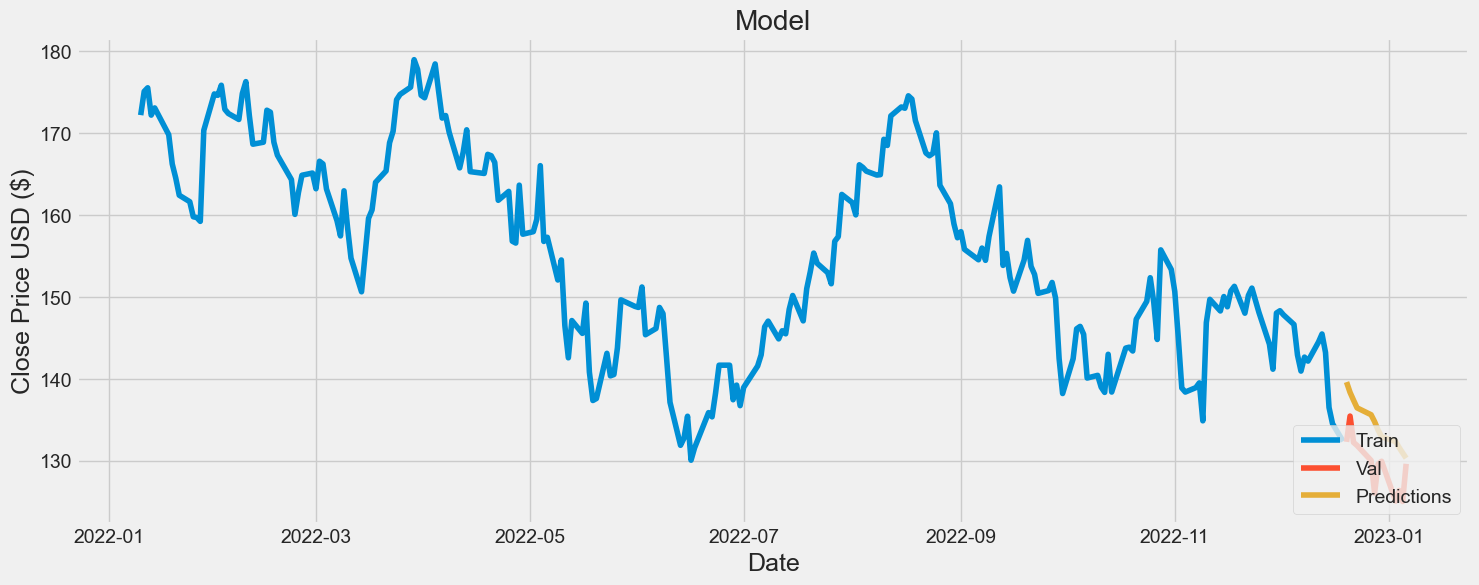

In [24]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [25]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-12-20,132.300003,139.598297
2022-12-21,135.449997,138.336823
2022-12-22,132.229996,137.376114
2022-12-23,131.860001,136.451370
2022-12-27,130.029999,135.610306
2022-12-28,126.040001,134.769012
2022-12-29,129.610001,133.731857
2022-12-30,129.929993,132.919113
2023-01-03,125.070000,132.333145
